In [1]:
# Load libraries
import pandas as pd  #for analysis and loading dataset
import seaborn as sns
from pandas.plotting import scatter_matrix  #viz relationship between numeric values
import matplotlib.pyplot as plt  #vizulation & plotting
from sklearn import model_selection #for splitting training and testing data/performance of model
from sklearn.metrics import classification_report  #generates a text report. to evaluates performance aftter fitting a model
from sklearn.metrics import confusion_matrix #evaluate accuracy(true positives, true negatives, false positives, and false negatives.)
from sklearn.metrics import accuracy_score  #ratio of correctly predicted instances to the total instances

In [2]:
#load ML models
from sklearn.linear_model import LogisticRegression  #binary classification problems
from sklearn.tree import DecisionTreeClassifier  #used for both classification & regression model
from sklearn.neighbors import KNeighborsClassifier  # It classifies a point based on the majority class among its K-nearest neighbors.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB  #normal distribution
from sklearn.svm import SVC  #(Support Vector Classifier)It finds the hyperplane that best separates the classes in the feature space.

In [3]:
#loading IRIS data set
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
names = ['sepal-length','sepal-width','petal-length','petal-width','class']
dataset=pd.read_csv(url,names=names)

**Analysing data**

In [4]:
print(dataset.head())

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [6]:
print(dataset.shape)  #150 rows and 5 columns

(150, 5)


In [7]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [10]:
print(dataset.groupby(by='class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


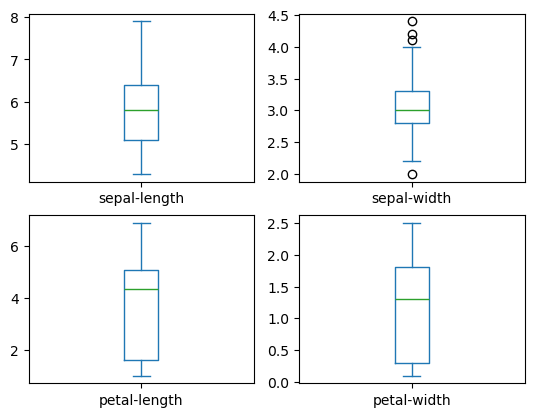

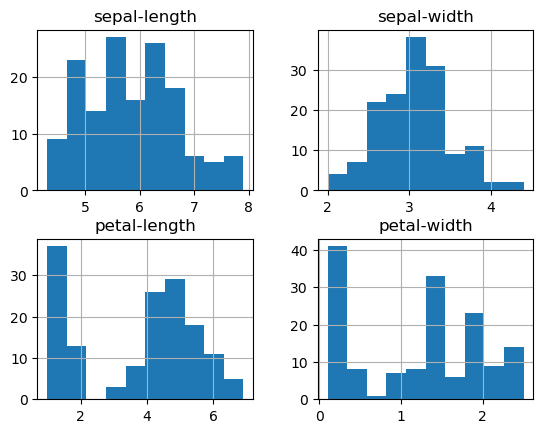

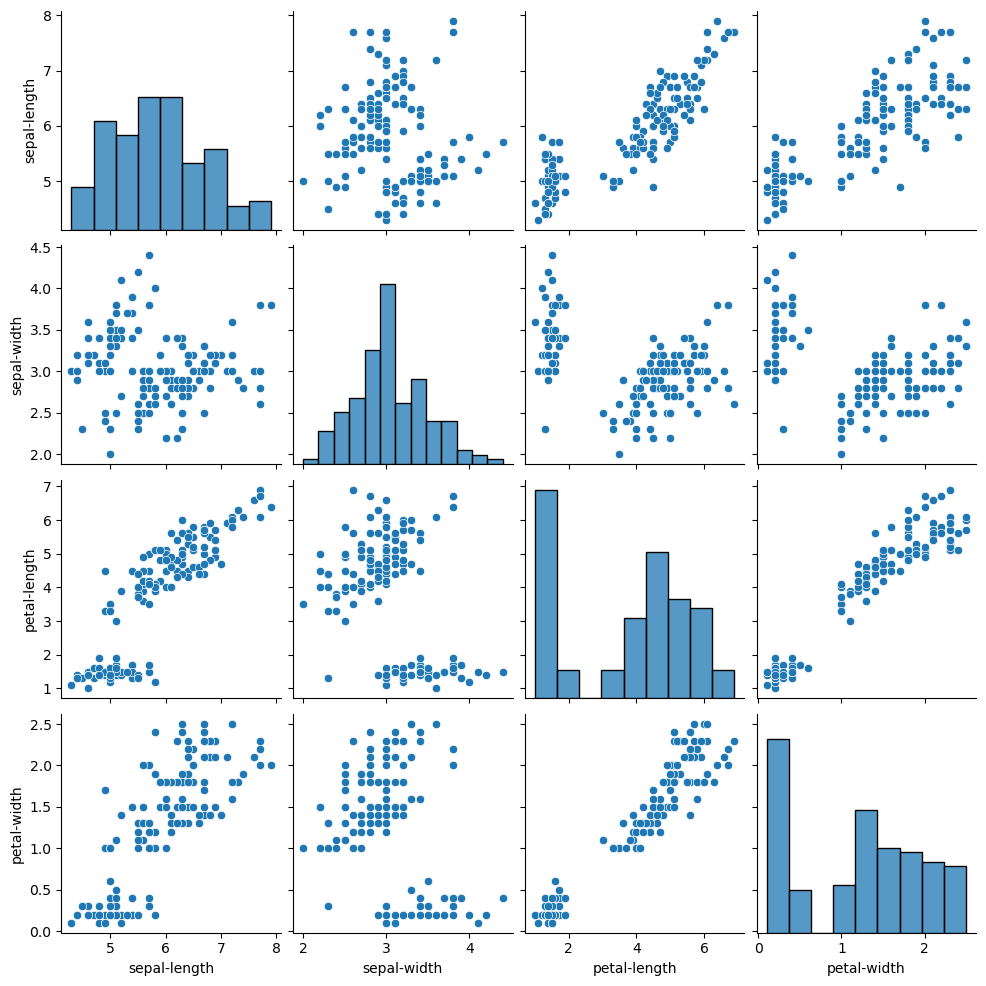

In [12]:
dataset.plot(kind='box',subplots=True,layout=(2,2))
dataset.hist()
# scatter_matrix(dataset)
sns.pairplot(dataset)
plt.show()

In [14]:
array = dataset.values
# print(array)

In [15]:
#splitting data into traing and testing
#here I have distributed data into 80% and 20% for training and testing respectively
x= array[:,0:4]
y= array[:,4]
validation_size=0.2
seed=7
scoring= 'accuracy'

In [17]:
x_train,x_validation,y_train,y_validation=model_selection.train_test_split(x,y,test_size=validation_size,random_state=seed)

In [18]:
models=[]
results=[]
names=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))

In [19]:
for name,model in models:
    kfold=model_selection.KFold(n_splits=10)
    cv_result=model_selection.cross_val_score(model,x_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_result)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_result.mean(), cv_result.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


In [20]:
#inferrnce from above result is SVM has highest mean and lowest standard deviation compared to others

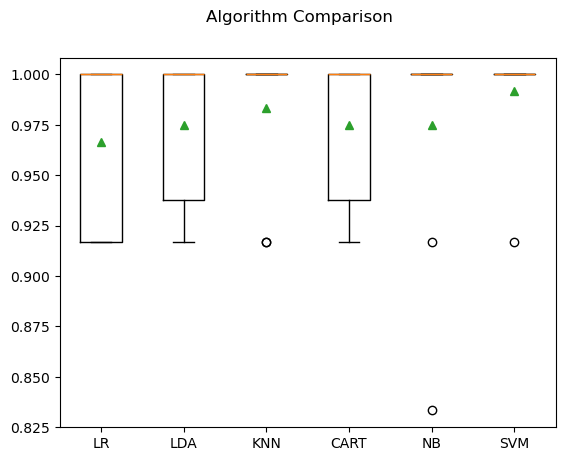

In [21]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results,showmeans = True)
ax.set_xticklabels(names)
plt.show()

In [22]:
# infernce of box plot - KNN,NB and SVM models are having only maximum values and hence can be considered a good model once the outliers are removed

In [23]:
#SVM
svm = SVC(gamma='auto')
svm.fit(x_train,y_train)
prediction=svm.predict(x_validation)
print(accuracy_score(y_validation,prediction))
print(confusion_matrix(y_validation,prediction))
print(classification_report(y_validation,prediction))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



In [24]:
#SVM has the accuracy of 93% and the model is best fit than others

In [25]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predictions = knn.predict(x_validation)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

